<h1>Simple approximation problem</h1>

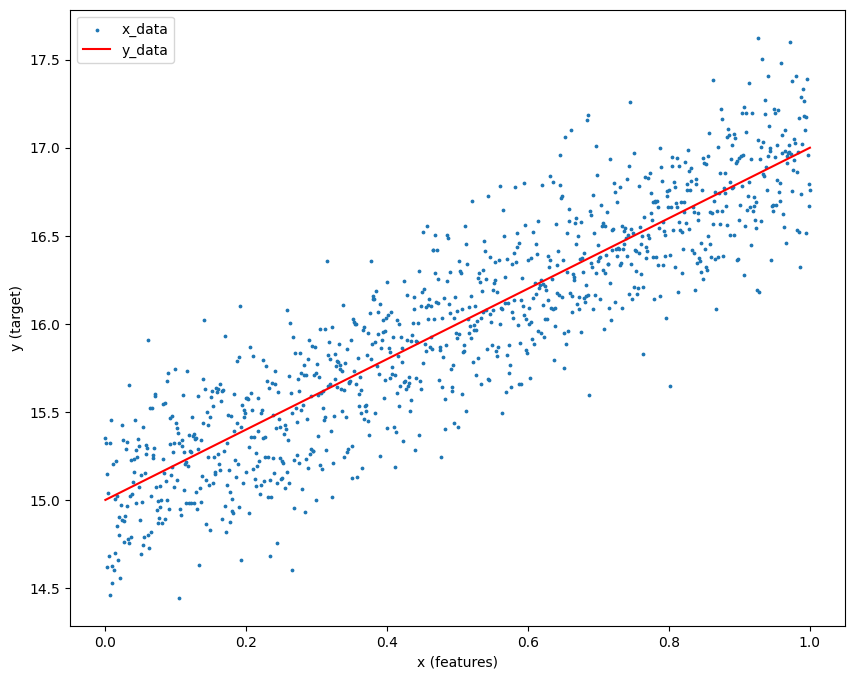

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from IPython import display

# create a noisy linear data
eps = 0.3
a , b = 2 , 15
x = np.linspace(0, 1, 1000)
data = pd.DataFrame({'target' : [], 'data' : []})
data.target = a * x + b 
data.data = a * x + b + np.random.randn(1000) * eps

X , y = data.data , data.target


Sequential(
  (0): Linear(in_features=700, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=300, bias=True)
)
Epoch [   1/5000], loss: 278.977295
Epoch [ 101/5000], loss: 244.059326
Epoch [ 201/5000], loss: 213.584732
Epoch [ 301/5000], loss: 186.915329
Epoch [ 401/5000], loss: 163.576035
Epoch [ 501/5000], loss: 143.151001
Epoch [ 601/5000], loss: 125.276382
Epoch [ 701/5000], loss: 109.633675
Epoch [ 801/5000], loss: 95.944191
Epoch [ 901/5000], loss: 83.964066
Epoch [1001/5000], loss: 73.479836
Epoch [1101/5000], loss: 64.304733
Epoch [1201/5000], loss: 56.275291
Epoch [1301/5000], loss: 49.248447
Epoch [1401/5000], loss: 43.099007
Epoch [1501/5000], loss: 37.717415
Epoch [1601/5000], loss: 33.007809
Epoch [1701/5000], loss: 28.886269
Epoch [1801/5000], loss: 25.279369
Epoch [1901/5000], loss: 22.122843
Epoch [2001/5000], loss: 19.360462
Epoch [2101/5000], loss: 16.943008
Epoch [2201/5000], loss: 14.827411
Epoch [2301/5000], loss: 12.975977
Epoch 

[Text(0.5, 1.0, 'Initial values'), Text(0, 0.5, 'y_train'), Text(0.5, 0, 'x')]

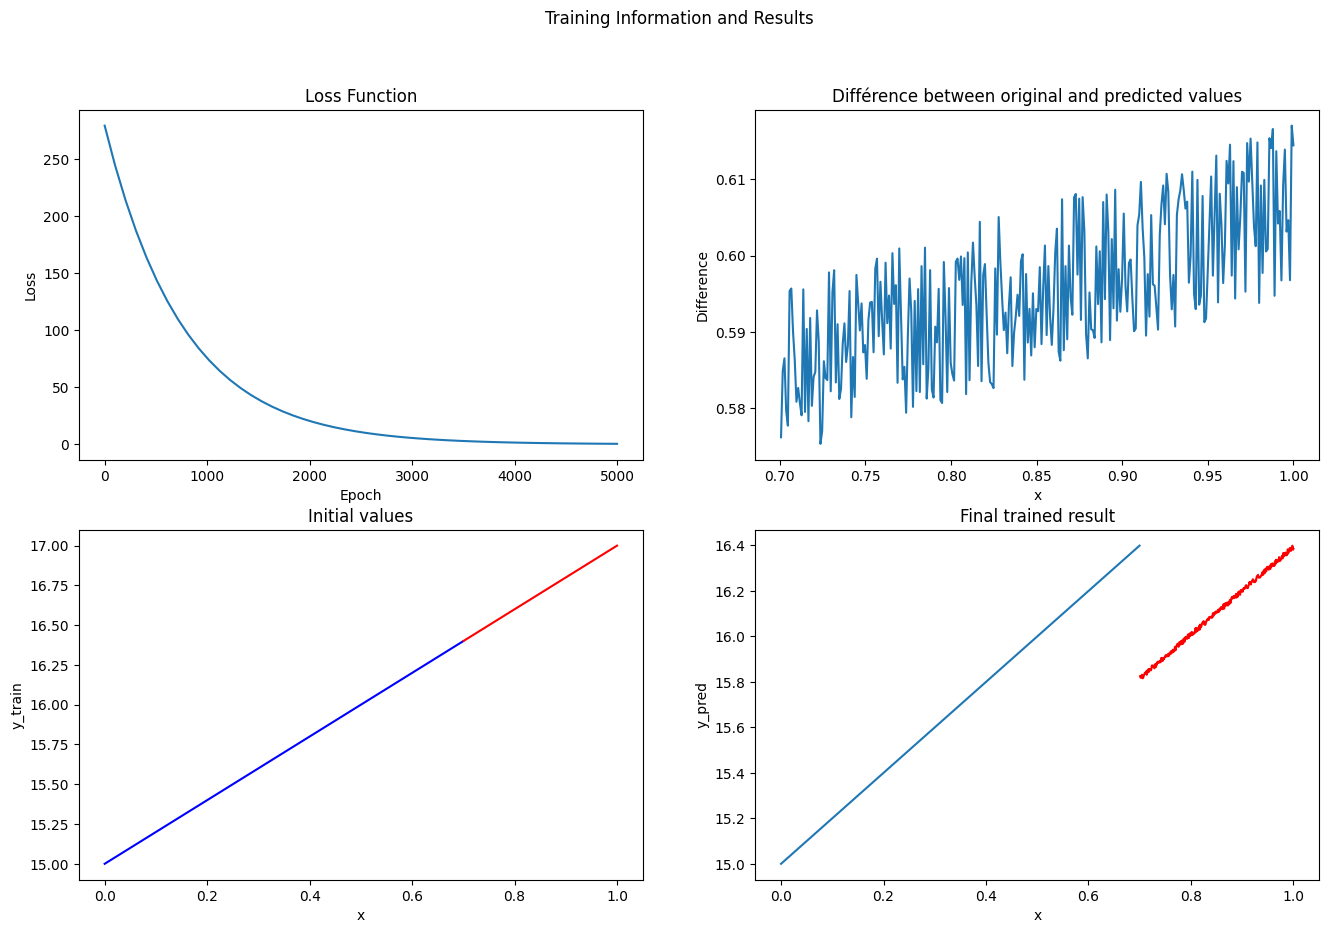

In [66]:
import copy
import tqdm
from sklearn.model_selection import train_test_split
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
# defines the data type of the variable used for w
dtype = torch.float

# defines the device in which we would like to keep the tensor
device = torch.device("cpu")

#definition of the Neural Network
batch_size = 1000
n_input = 100
n_hidden = 1
n_out = 2
learning_rate = 0.1

# Convert to 2D PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

model = nn.Sequential(
            nn.Linear(in_features=700 , out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10, out_features=300),
            # nn.ReLU(),
            # nn.Linear(10, 2)
)
print(model)

loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training parameters
n_epochs = 5000   # number of epochs to run
batch_size = 10  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)

# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []


# Used to enable training analysis through TensorBoard
# Writer will output to ./runs/ directory by default
writer = SummaryWriter()

# training loop
for epoch in range(n_epochs):
    y_pred = model(X_train[0:700]) 
    loss =loss_function(y_pred, y_train[700:])
    if epoch % 100 == 0:
        print(f"Epoch [{epoch+1:4}/{n_epochs}], loss: {loss:.6f}")
        # Write epoch loss for TensorBoard
        writer.add_scalar("Loss/train", loss.item(), epoch)
        history.append(loss.item())


    model.zero_grad()
    loss.backward()

    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    

print(f"Training finished. Final loss: {loss:.6f}")
a = np.linspace(1,n_epochs,n_epochs//100).astype(int)

fig , axs = plt.subplots(2,2 , figsize=(16,10))
fig.suptitle("Training Information and Results")

ax1 = axs[0,0]
ax1.plot(a,history)
ax1.set(xlabel="Epoch" , ylabel="Loss",title='Loss Function')

final_result = y_train[700:] - y_pred
ax2 = axs[0,1]
ax2.plot(x[700:],final_result.detach().numpy())
ax2.set(ylabel='Difference',xlabel='x')
ax2.set_title('Différence between original and predicted values')

ax3 = axs[1,1]
ax3.plot(x[0:700],y_train[0:700],x[700:],y_pred.detach().numpy(),'r')
ax3.set(title='Final trained result',ylabel='y_pred',xlabel='x')

ax4 = axs[1,0]
ax4.plot(x[0:700],y_train[0:700],'b',x[700:],y_train[700:],'r')
ax4.set(title='Initial values',ylabel='y_train',xlabel='x')